# Hospital example

In [1]:
import numpy as np
import pandas
from IPython.core.display import display

import raha

In [2]:
datasets = []

for i in range(10):
    from raha import analysis_utilities
    app_1 = raha.Detection()
    app_2 = raha.Correction()

    # How many tuples would you label?
    app_1.LABELING_BUDGET = 20
    app_2.LABELING_BUDGET = 0

    # Would you like to see the logs?
    app_1.VERBOSE = False
    app_2.VERBOSE = False

    dataset_dictionary = {
        "name": "hospital",
        "path": "datasets/hospital/dirty.csv",
        "clean_path": "datasets/hospital/clean.csv"
    }
    d = app_1.initialize_dataset(dataset_dictionary)

    app_1.run_strategies(d)
    app_1.generate_features(d)
    app_1.build_clusters(d)

    while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
        app_1.sample_tuple(d)
        if d.has_ground_truth:
            app_1.label_with_ground_truth(d)

    app_1.propagate_labels(d)
    app_1.predict_labels(d)

    app_2.initialize_models(d)
    app_2.initialize_dataset(d)
    for si in d.labeled_tuples:
        d.sampled_tuple = si
        app_2.update_models(d)
        app_2.generate_features(d)
        app_2.predict_corrections(d)

    print(f"Run {i} done")

    datasets.append(d)

I just load strategies' results as they have already been run on the dataset!


Run 0 done


I just load strategies' results as they have already been run on the dataset!


Run 1 done


I just load strategies' results as they have already been run on the dataset!


Run 2 done


I just load strategies' results as they have already been run on the dataset!


Run 3 done


I just load strategies' results as they have already been run on the dataset!


Run 4 done


I just load strategies' results as they have already been run on the dataset!


Run 5 done


I just load strategies' results as they have already been run on the dataset!


Run 6 done


I just load strategies' results as they have already been run on the dataset!


Run 7 done


I just load strategies' results as they have already been run on the dataset!


Run 8 done


I just load strategies' results as they have already been run on the dataset!


Run 9 done


## Evaluation

In [3]:
evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])

for d in datasets:
    edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
    ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

    evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": edp,
                                          "Recall": edr, "F1 Score": edf}, ignore_index=True)
    evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": ecp,
                                          "Recall": ecr, "F1 Score": ecf}, ignore_index=True)
display(evaluation_df)

evaluation_df.groupby("Task").agg(["mean", "std", "min", "max"])

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.885965,0.595285,0.712103
1,Error Correction (Baran),0.851211,0.483301,0.616541
2,Error Detection (Raha),0.969697,0.565815,0.714640
3,Error Correction (Baran),0.835052,0.477407,0.607500
4,Error Detection (Raha),0.983380,0.697446,0.816092
5,Error Correction (Baran),0.817919,0.555992,0.661988
6,Error Detection (Raha),0.881919,0.469548,0.612821
7,Error Correction (Baran),0.649789,0.302554,0.412869
8,Error Detection (Raha),0.951654,0.734774,0.829268
9,Error Correction (Baran),0.823529,0.632613,0.715556


Precision                                  Recall  \
                              mean       std       min       max      mean   
Task                                                                         
Error Correction (Baran)  0.790908  0.065406  0.649789  0.851211  0.501965   
Error Detection (Raha)    0.925876  0.054068  0.812796  0.983380  0.624558   

                                                        F1 Score            \
                               std       min       max      mean       std   
Task                                                                         
Error Correction (Baran)  0.111014  0.302554  0.660118  0.609172  0.095662   
Error Detection (Raha)    0.108712  0.469548  0.756385  0.741543  0.086888   

                                              
                               min       max  
Task                                          
Error Correction (Baran)  0.412869  0.740904  
Error Detection (Raha)    0.612821  0.844298

## Analyze the alternative repairs

In [4]:
alternative_count_list = []

for d in datasets:
    number_of_repairs = len(d.correction_collection)
    number_of_repairs_hist = dict()

    for cell_repairs in d.correction_collection.values():
        num = len(cell_repairs)
        number_of_repairs_hist[num] = number_of_repairs_hist.get(num, 0) + 1

    hist = [0] * (max(number_of_repairs_hist.keys()) + 1)
    for num, count in number_of_repairs_hist.items():
        hist[num] = count

    alternative_count_list.append(number_of_repairs_hist)

    #print(f"Histogram of the number of alternative repairs: {list(enumerate(hist))}")

max_alternatives = max(max(h.keys()) for h in alternative_count_list)

alternative_count_df = pandas.DataFrame(columns=list(range(max_alternatives + 1)))

for hist in alternative_count_list:
    alternative_count_df = alternative_count_df.append(hist, ignore_index=True)

alternative_count_df.drop(0,axis=1,inplace=True)
alternative_count_df = alternative_count_df.fillna(0)
alternative_count_df

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
0,228.0,26.0,2.0,3.0,2.0,3.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,212.0,47.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,227.0,62.0,12.0,3.0,2.0,2.0,3.0,5.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,136.0,40.0,9.0,2.0,3.0,9.0,8.0,2.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,230.0,102.0,14.0,3.0,1.0,0.0,8.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,207.0,72.0,24.0,13.0,3.0,9.0,2.0,1.0,2.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,180.0,36.0,11.0,2.0,2.0,0.0,8.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,282.0,48.0,14.0,4.0,0.0,1.0,17.0,2.0,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,290.0,58.0,1.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,...,1.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,176.0,51.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
mean_number_of_repairs = (alternative_count_df * np.arange(1,max_alternatives+1,1)).sum(axis=1) / alternative_count_df.sum(axis=1)
mean_number_of_repairs.agg(["mean", "std", "min", "max"])

mean    1.737485
std     0.384027
min     1.247826
max     2.502222
dtype: float64

In [6]:
more_than_one = alternative_count_df.loc[:, alternative_count_df.columns[1:]].sum(axis=1) / alternative_count_df.sum(axis=1)
more_than_one.agg(["mean", "std", "min", "max"])

mean    0.280013
std     0.081709
min     0.149254
max     0.395556
dtype: float64

In [7]:
print("Mean number of cells with x predicted alternatives in 10 runs")
mean_count_series = alternative_count_df.mean()
mean_count_series

Mean number of cells with x predicted alternatives in 10 runs


1     216.8
2      54.2
3      10.4
4       3.1
5       1.3
6       2.6
7       4.7
8       1.8
9       2.2
10      0.6
11      0.4
12      1.1
13      0.3
14      0.3
15      0.2
16      0.0
17      0.2
18      0.3
19      0.1
20      0.6
21      0.2
22      0.0
23      0.1
24      0.0
25      0.1
26      0.0
27      0.0
28      0.1
dtype: float64

In [10]:
correct_repairs = datasets[0].get_actual_errors_dictionary()

collection = []
correct_repair_probs = []
incorrect_repair_probs = []
other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]
    #print(f"Number of incorrectly repaired cells: {len(error_repaired_cells)}")

    correct_repair_available = 0

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell].keys():
            correct_repair_available += 1

    #print(f"Number of incorrectly repaired cells, where the correct repair is among the alternative repairs: {correct_repair_available}")

    collection.append((len(error_repaired_cells),correct_repair_available))

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell]:
            correct_repair_probs.append(d.correction_collection[cell][correct_repairs[cell]])
            incorrect_repair_probs.append(d.correction_confidences[cell])
            other_repair_probs.append([prob for val, prob in d.correction_collection[cell].items()
                                       if val not in [correct_repairs[cell], d.corrected_cells[cell]]])

print("Proportion of wrong repairs to erroneous values that can be corrected by using one of the alternative repairs.")
repairable_df = pandas.DataFrame(collection, columns=["errors","repairs"])
repairable_df["repair_percentage"] = repairable_df["repairs"] / repairable_df["errors"]
print(repairable_df["repair_percentage"].agg(["mean", "std", "min", "max"]))

mean    0.599643
std     0.244627
min     0.276596
max     0.961538
Name: repair_percentage, dtype: float64


In [18]:
print("Distribution of the probabilities assigned to the correct repairs.")
print(pandas.Series(correct_repair_probs).agg(["mean", "std", "min", "max"]))

#np.histogram(correct_repair_probs,np.linspace(0.5,1.0,101))

mean    0.996887
std     0.031710
min     0.543884
max     1.000000
dtype: float64


In [19]:
print("Distribution of the probabilities assigned to the chosen repairs.")
print(pandas.Series(incorrect_repair_probs).agg(["mean", "std", "min", "max"]))

#np.histogram(incorrect_repair_probs,np.linspace(0.5,1.0,101))

mean    0.999637
std     0.003962
min     0.936457
max     1.000000
dtype: float64


In [20]:
flat_others = [value for sublist in other_repair_probs for value in sublist]

print("Distribution of the probabilities assigned to all other alternatives, that are neither the correct not the chosen repair.")
print(pandas.Series(flat_others).agg(["mean", "std", "min", "max"]))

#np.histogram(flat_others,np.linspace(0.5, 1.0, 101))

mean    0.982135
std     0.070091
min     0.543676
max     1.000000
dtype: float64


In [14]:
correct_s = pandas.Series(correct_repair_probs)
incorrect_s = pandas.Series(incorrect_repair_probs)
max_other_s = pandas.Series(max(other + [0]) for other in other_repair_probs)

print("Number of repairs fixable by alternatives.")
print(len(correct_s))

print("Proportion of cases where the correct repair has the highest probability among all alternatives")
print((correct_s > max_other_s).sum() / len(correct_s))
print((correct_s > incorrect_s).sum() / len(correct_s))
print((correct_s == incorrect_s).sum() / len(correct_s))
print((correct_s >= incorrect_s).sum() / len(correct_s))
print(((correct_s > incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s == incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) | (max_other_s >= incorrect_s)).sum() / len(correct_s))

abs(correct_s - incorrect_s).describe()

315
0.6825396825396826
0.012698412698412698
0.9396825396825397
0.9523809523809523
0.0031746031746031746
0.6730158730158731
0.6761904761904762
0.9746031746031746


count    315.000000
mean       0.002771
std        0.029524
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.450531
dtype: float64

In [23]:
other_count = pandas.Series(len(other) for other in other_repair_probs)
print("Proportion of cases where there only is the correct alternative available")
print((other_count == 0).sum() / len(other_count))

print("Proportion of cases where there are more alternatives than the correct one and the correct alterantive has the highest probability.")
print(((correct_s == max_other_s) & (other_count > 0)).sum() / (other_count > 0).sum())

Proportion of cases where there only is the correct alternative available
0.6666666666666666
Proportion of cases where there are more alternatives than the correct one and the correct alterantive has the highest probability.
0.819047619047619


In [16]:
incorrect_repair_probs_full = []
max_other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]

    for cell in error_repaired_cells:
        incorrect_repair_probs_full.append(d.correction_confidences[cell])
        max_other_repair_probs.append(max([prob for val, prob in d.correction_collection[cell].items()
                                   if val != d.corrected_cells[cell]] + [0]))

In [17]:
print(len(incorrect_repair_probs_full))
print(len(max_other_repair_probs))

incorrect_repair_probs_full = pandas.Series(incorrect_repair_probs_full)
max_other_repair_probs = pandas.Series(max_other_repair_probs)

print((max_other_repair_probs >= incorrect_repair_probs_full).sum() / len(max_other_repair_probs))

print(incorrect_repair_probs_full.agg(["mean", "std", "min", "max"]))

np.histogram(incorrect_repair_probs_full, np.linspace(0.5,1.0,101))

502
502
0.7470119521912351
mean    0.986834
std     0.069742
min     0.500980
max     1.000000
dtype: float64


(array([  7,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   1,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   1,   0,   0,   0,   1,   2,
          0,   0,   0,   0,   0,   1,   0,   2,   0,   1,   0,   0,   0,
          0,   0,   0,   1,   1,   2,   3,   4, 468]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        

## Analyze confidence vs error probability

In [16]:
import importlib
from raha import analysis_utilities
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.ion()

In [17]:
importlib.reload(analysis_utilities)

<module 'raha.analysis_utilities' from '/home/adrian/source/MA/raha/raha/analysis_utilities.py'>

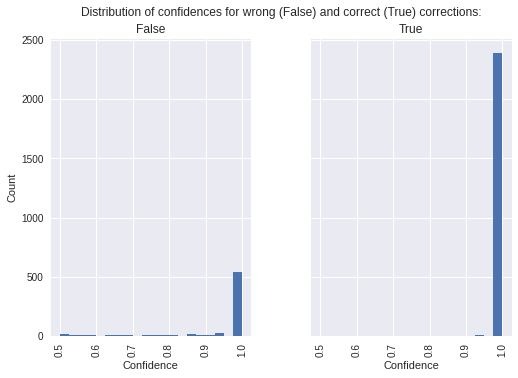

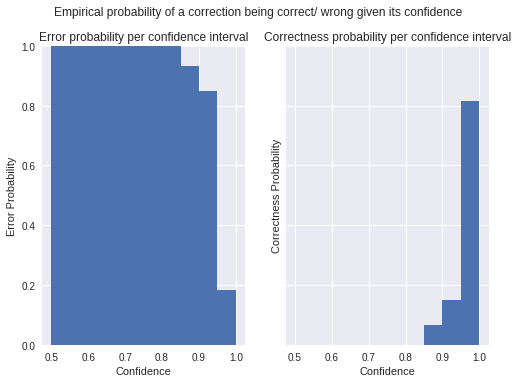

In [18]:
r_p_dfs = []

for d in datasets:

    r_p_dfs.append(analysis_utilities.get_correction_confidence_df(d))

r_p_df = pandas.concat(r_p_dfs)

display(analysis_utilities.correction_confidence_distributions(r_p_df))
display(analysis_utilities.correction_correctness_by_confidence(r_p_df, number_of_bins=10))

## Analyze detection confidence vs error probability

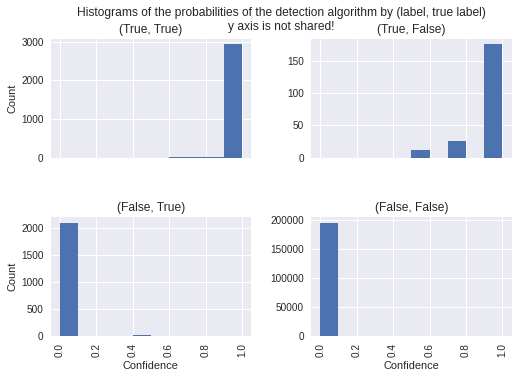

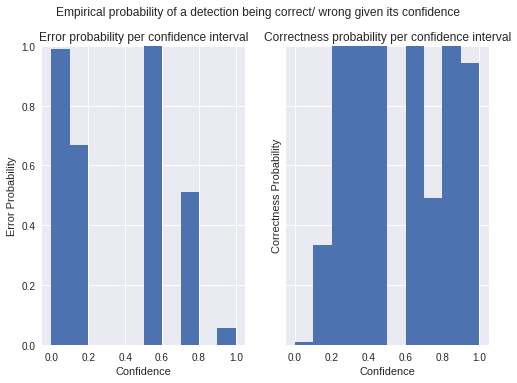

In [19]:
evaluation_dfs = []

for d in datasets:
    df = analysis_utilities.get_detection_evaluation_df(d)
    evaluation_dfs.append(df)
    #display(df)
    #display(df.value_counts(subset=["detected", "truth"]))
    #display(analysis_utilities.detection_evaluation(df))
    #display(analysis_utilities.detection_correctness_by_confidence(df,number_of_bins=10))

df = pandas.concat(evaluation_dfs)
display(analysis_utilities.detection_evaluation(df))
display(analysis_utilities.detection_correctness_by_confidence(df))

In [21]:
1 - ((df["p"] < 0.05) | (df["p"] > 0.95)).sum() / len(df.index)

0.0005500000000000504